In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation

In [3]:
def hex_to_RGB(hex_str):
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


<h1>Subida da Colina </h1>
<p><i>Subida da Colina</i> trata-se de um <b>algoritmo de busca local</b> com <b>aperfeiçoamento iterativo</b>. O algoritmo é aplicado a um ponto <i>x</i> no espaço de busca e, a cada iteração, um novo ponto <i>x'</i> é selecionado realizando uma <i>perturbação</i> no ponto atual., de forma que o novo ponto seja selecionado na vizinhança do atual.</p>

$$ 
    x' = x + \Delta x 
$$

<p>Se um novo ponto obtiver um valor melhor na fução de avaliação, ele passa a ser o ponto atual: <i> x = x' </i>. Se não, ele é descartado. </p>
<p>Os critérios de parada podem ser a) um número fixo de iterações; b) um ponto alvo foi atingido; e c) nenhuma melhoria foi obtida.  </p>
<p>O algoritmo é definido da seguinte forma: dado <i>x</i> o ponto atual, <i>g</i> é o valor alvo para a função de avaliação (assumindo que seja conhecido), e <i>max_it</i> o número máximo de iterações: <p>


In [4]:
def hill_climbing(max_it, g):
    x = inicializar_x()
    y = avaliar(x)
    t = 1
    while t <= max_it and y != g:
        xi = perturbar(x)
        yi = avaliar(xi)
        if yi > y:
            x = xi
            y = yi
        t += 1 
    return x

<p> Para este exemplo, <i>x</i> é inicializado com um valor aleatório entre 0 e 1 </p>

In [5]:
def inicializar_x():
    return random.uniform(0, 1)

A função <i>avaliar</i> nada mais é a função que buscamos otimizar, para este exemplo: 
$$
 g(x) = 2^{-2 (\frac{x-0.1}{0.9})^2} (sin(5 \pi x))^6
$$

In [6]:
def avaliar(x):
    return (2 ** (-2*((x-0.1)/(0.9))**2)) * (np.sin(5*np.pi*x)**6)

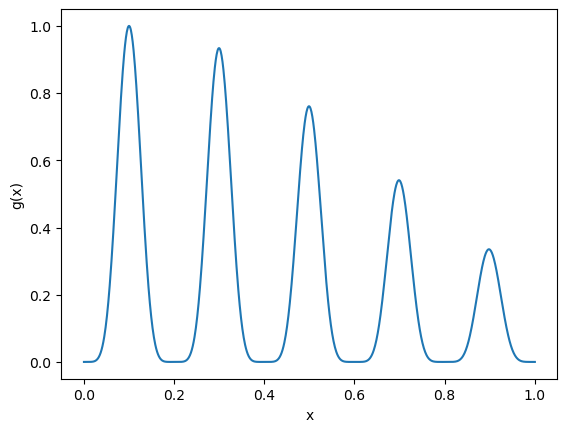

In [7]:
def grafico_func(grafico, func):
    x = np.linspace(0, 1, 1000)
    grafico.plot(x, func(x))

fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("g(x)")
grafico_func(ax, avaliar)
plt.show()

<p><i>perturbar</i> é o método responsável por fazer </p>

$$ 
    x' = x + \Delta x 
$$

<p>Para este exercício, usaremos um ruído Gaussiano de média zero e pequena variância. Também descartaremos resultados fora do intervalo 0 e 1.</p>

In [8]:
def perturbar(x):
    delta = random.gauss(0, 0.001)
    xi = x + delta
    if xi > 1 or xi < 0:
        return x
    return xi

<p>Assim, podemos rodar nosso algoritmo para ver como ele se sai:</p>
<p>Se o rodarmos várias vezes notamos que os resultados são muito diferentes.</p>

In [9]:
hill_climbing_x = hill_climbing(100, 1.0)
print("x = " + str(hill_climbing_x) + ", y = " + str(avaliar(hill_climbing_x)) )

x = 0.6456813547773645, y = 0.04855598986463673


<p> Vamos visualizar o que é feito:</p>

In [10]:
def hill_climbing_v2(max_it, g, axes, txt):
    axes.set_xlabel("x")
    axes.set_ylabel("g(x)")
    grafico_func(axes, avaliar)
    colors = get_color_gradient("#f2d8de", "#f0053c", max_it)
    x = inicializar_x()
    y = avaliar(x)
    t = 1
    while t <= max_it and y != g:
        xi = perturbar(x)
        yi = avaliar(xi)
        if yi > y:
            x = xi
            y = yi
            axes.scatter(x, y, c= colors[t-1])
        t += 1
    txt = '\n'.join((txt, f'x = %.3f'%x, f'y = %.3f'%avaliar(x)))
    axes.text(0.65, 0.95, txt, transform=axes.transAxes, fontsize=10, verticalalignment='top', bbox= dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    return x

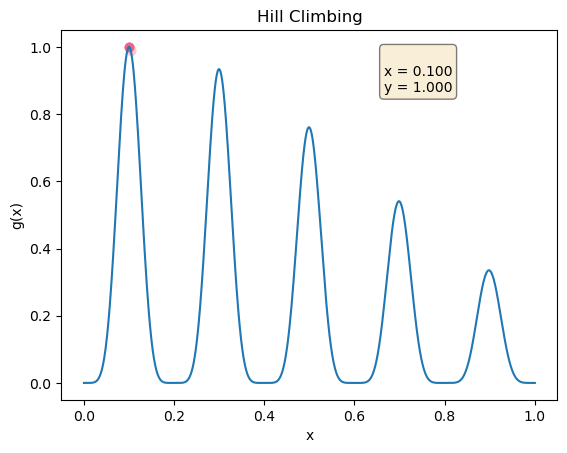

In [40]:

def showAlg(title, alg, max_it, g):
    fig, ax = plt.subplots()
    ax.set_title(title)
    resultado = alg(max_it, g, ax, '')
    plt.show()

showAlg("Hill Climbing", hill_climbing_v2, 100, 1.0)

<p>Vamos variar os parâmetros da função e observar como ela se comporta: </p>

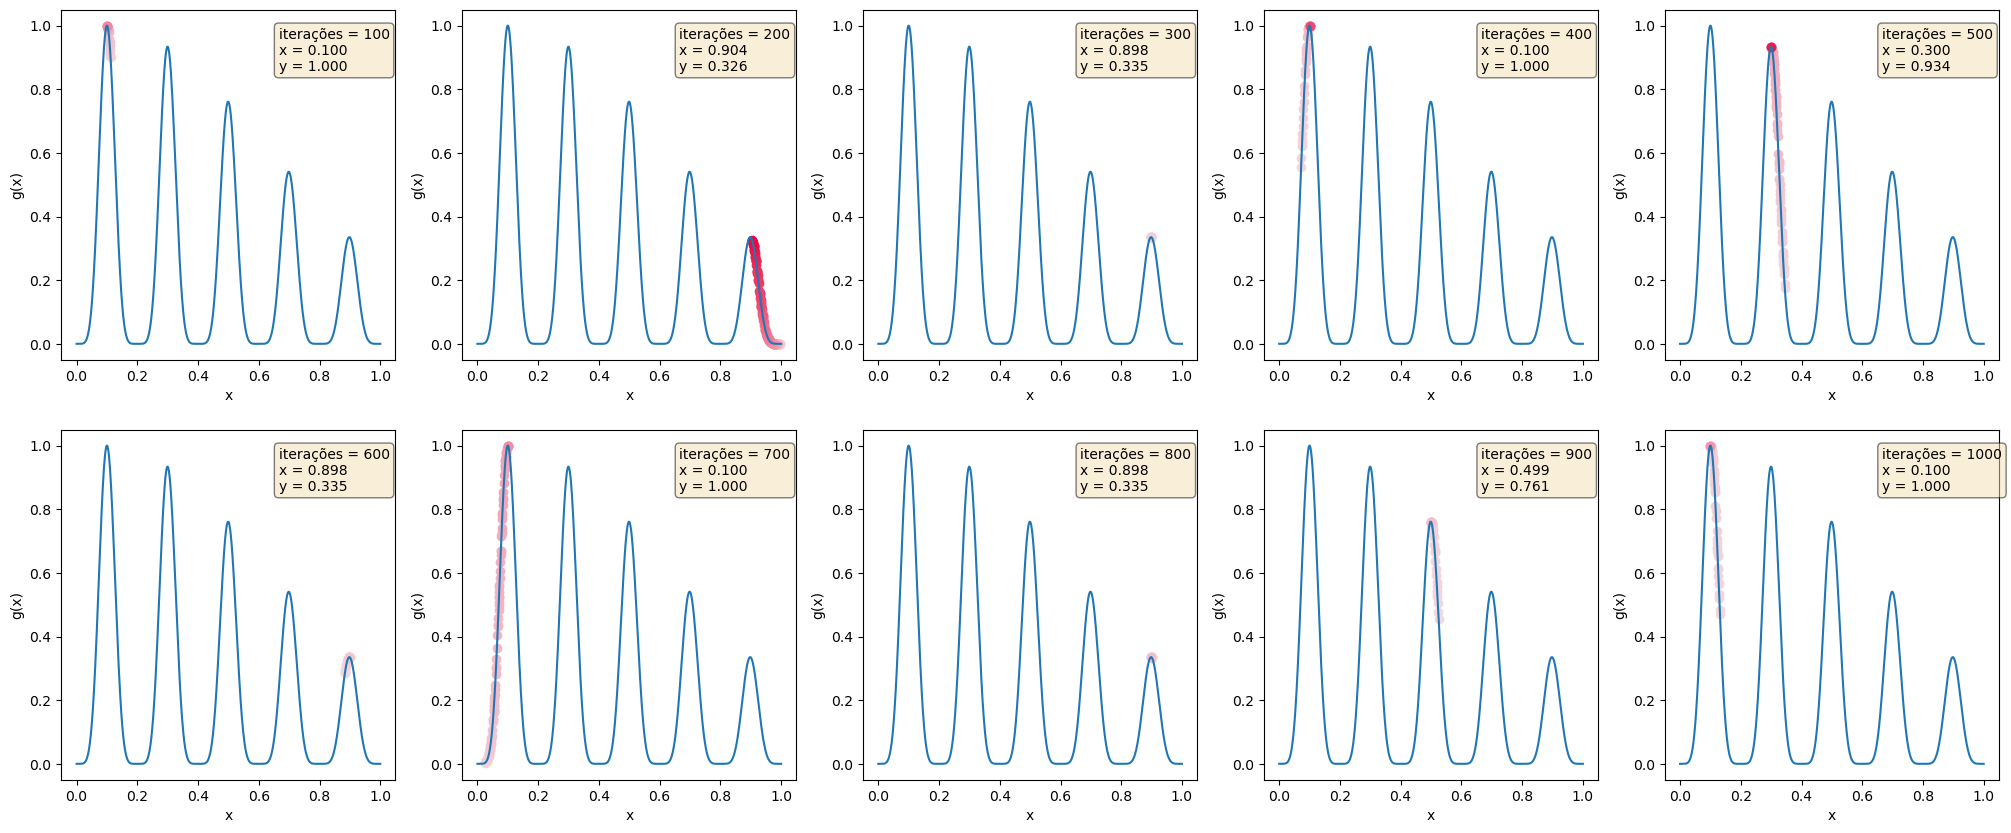

In [12]:
def hill_clibing_variando_iteracoes():
    fig, axs = plt.subplots(2, 5, figsize=(25, 10))
    fig.suptitle('')
    c = 1
    for i in range(1, 3):
        for j in range(1, 6):
            txt = f'iterações = {c*100}'
            hill_climbing_v2((c*100), 1.0, axs[i-1, j-1], txt)
            c += 1
    plt.show()

hill_clibing_variando_iteracoes()

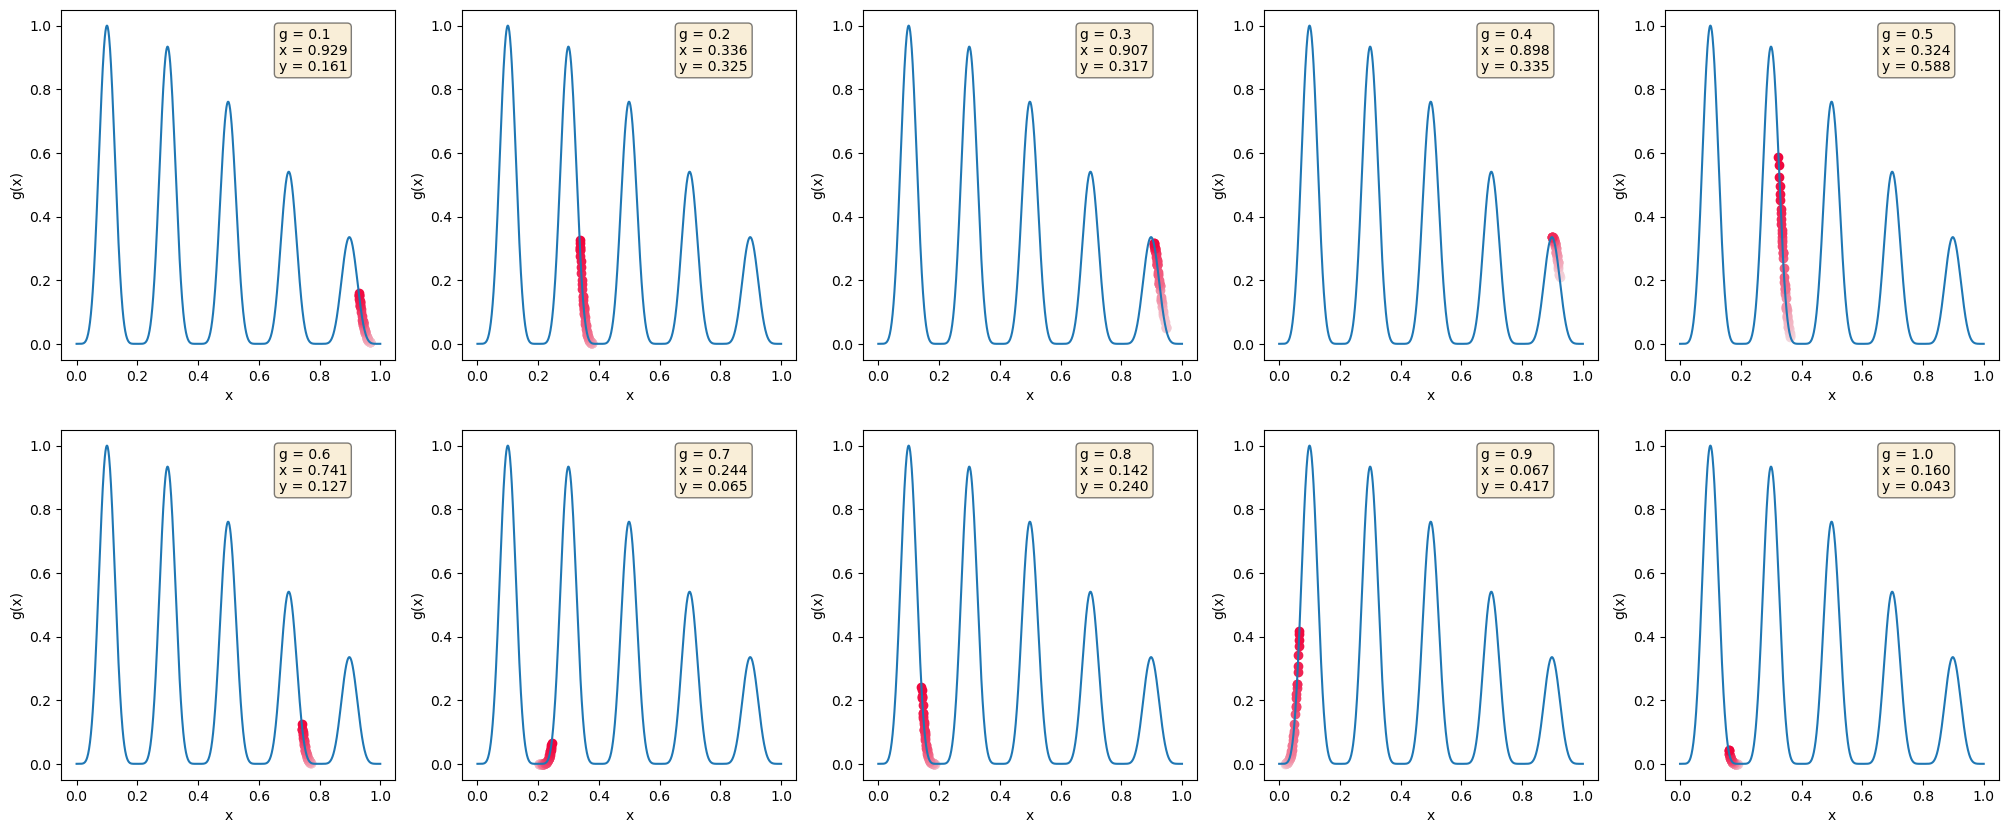

In [13]:
def hill_clibing_variando_g():
    fig, axs = plt.subplots(2, 5, figsize=(25, 10))
    fig.suptitle('')
    c= 1
    for i in range(1, 3):
        for j in range(1, 6):
            g = c*0.1
            txt = 'g = %.1f'%(g)
            x = hill_climbing_v2(100, g, axs[i-1, j-1], txt)
            c += 1
    plt.show()

hill_clibing_variando_g()

In [48]:
import time
from statistics import mean, stdev

def runSubidaDaColina():
    time_ = []
    brs_ = []
    for i in range(100):
        start = time.process_time()
        r = ihc(10, 100, 1.0)
        end = time.process_time()
        time_.append(end-start)
        brs_.append(r)
    print(f"best results \t mean:  %.3f"%mean(brs_), f"\t\t stdev:  %.3f"%stdev(brs_))
    print("time \t \t mean: ", mean(time_), "\t stdev: ", stdev(time_))
    return time_

    t = runSubidaDaColina()

<p> Podemos concluir que apesar de aumentar as iterações, o algoritmo ainda cairá num máximo local pois, uma vez que tenha chegado num máximo, a próxima avalização será menor e, portanto, não seguirá. </p>
<p> Já o valor procurado (g), não faz tanta diferença no algoritmo, especialmente para a forma que foi implementada onde inicializamos x com um valor com várias casas após a vírgula e a função de avaliação parece retornar números bastante quebrados também, sendo assim, a chance de g ser igual a avaliar(x) é baixa, mas se não for o caso, é esperado que o algoritmo pare se encontrar o valor, porém há pouca chance que aconteça pois iniciando x com um valor aleatório e, el estando limitado a um máximo local, para que o algoritmo pare em g, seria necessário que x esteja antes do valor g procurado e que suba até ele. </p>
<p> Vamos alterar o algoritmo para que ele pare num g </p>

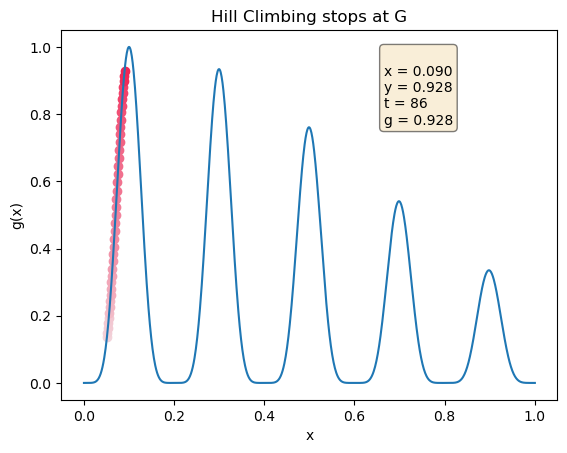

In [14]:
def perturbar_v2(x):
    delta = 0.001 * random.choice((-1, 1))
    xi = x + delta
    if xi > 1 or xi < 0:
        return x
    return xi

def hill_climbing_v3(max_it, g, axes, txt):
    axes.set_xlabel("x")
    axes.set_ylabel("g(x)")
    grafico_func(axes, avaliar)
    colors = get_color_gradient("#f2d8de", "#f0053c", max_it)
    x = 0.05
    y = avaliar(x)
    t = 1
    while t <= max_it and y != g:
        xi = perturbar_v2(x)
        yi = avaliar(xi)
        if yi > y:
            x = xi
            y = yi
            axes.scatter(x, y, c= colors[t-1])
        t += 1
    txt = '\n'.join((txt, f'x = %.3f'%x, f'y = %.3f'%avaliar(x), f't = {t}', f'g = %.3f'%g))
    axes.text(0.65, 0.95, txt, transform=axes.transAxes, fontsize=10, verticalalignment='top', bbox= dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    return x
    
showAlg("Hill Climbing stops at G", hill_climbing_v3, 100,  avaliar(0.09))

<h1> Subida da Colina Iterativo </h1>
<p>Os pontos iniciais podem ser escolhidos aleatoriamente, regularmente ou a partir de informações. Nesta versão iniciamos o algoritmo <i>Subida da Colina</i> diversas vezes e mantemos a memória da melhor solução</p>

In [15]:
def ihc(n_start, max_it, g):
    melhor = inicializar_x()
    t1 = 1
    while t1 <= n_start and avaliar(melhor) != g:
        x = hill_climbing(max_it, g)
        t1 += 1
        if avaliar(x) > avaliar(melhor):
            melhor = x
    return melhor

In [16]:
ihc_x = ihc(10, 100, 1.0)
print("x = " + str(ihc_x) + ", y = " + str(avaliar(ihc_x)) )

x = 0.10006126482186456, y = 0.9999972152526401


In [75]:
def runSubidaDaColinaIterativo():
    time_ = []
    brs_ = []
    for i in range(100):
        start = time.process_time()
        r = ihc(40, 100, 1.0)
        end = time.process_time()
        time_.append(end-start)
        brs_.append(r)
    print(f"best results \t mean:  %.3f"%mean(brs_), f"\t\t stdev:  %.3f"%stdev(brs_))
    print("time \t \t mean: ", mean(time_), "\t stdev: ", stdev(time_))
    return time_

t = runSubidaDaColinaIterativo()

best results 	 mean:  0.100 		 stdev:  0.001
time 	 	 mean:  0.004375 	 stdev:  0.007050950935222078


<p>Podemos notar que a resposta varia menos entre as rodadas. Vamos visualizar o que acontece em uma rodada do algoritmo:</p>

In [17]:
def ihc_v2(n_start, max_it, g, hc, T = None):
    lines = n_start//3 + (n_start % 3 > 0)
    fig, axs = plt.subplots(lines, 3, figsize=(15, 15))
    fig.suptitle('Iterative Hill Climbing')
    melhor = inicializar_x()
    it = 1
    melhor_it = it
    for i in range(lines):
        t1 = 0
        while t1 < 3 and avaliar(melhor) != g:
            txt = f'iteração = {it}'
            if (T is not None):
                x = hc(max_it, T, axs[i, t1], txt)
            else:
                x = hc(max_it, g, axs[i, t1], txt)
            if avaliar(x) > avaliar(melhor):
                melhor = x
                melhor_it = it
            t1 += 1
            it += 1
    plt.figtext(0.5, 0.92, 'melhor iteração = %i \n x = %.3f \n y =  %.3f'%(melhor_it, melhor, avaliar(melhor)), wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()
    return melhor

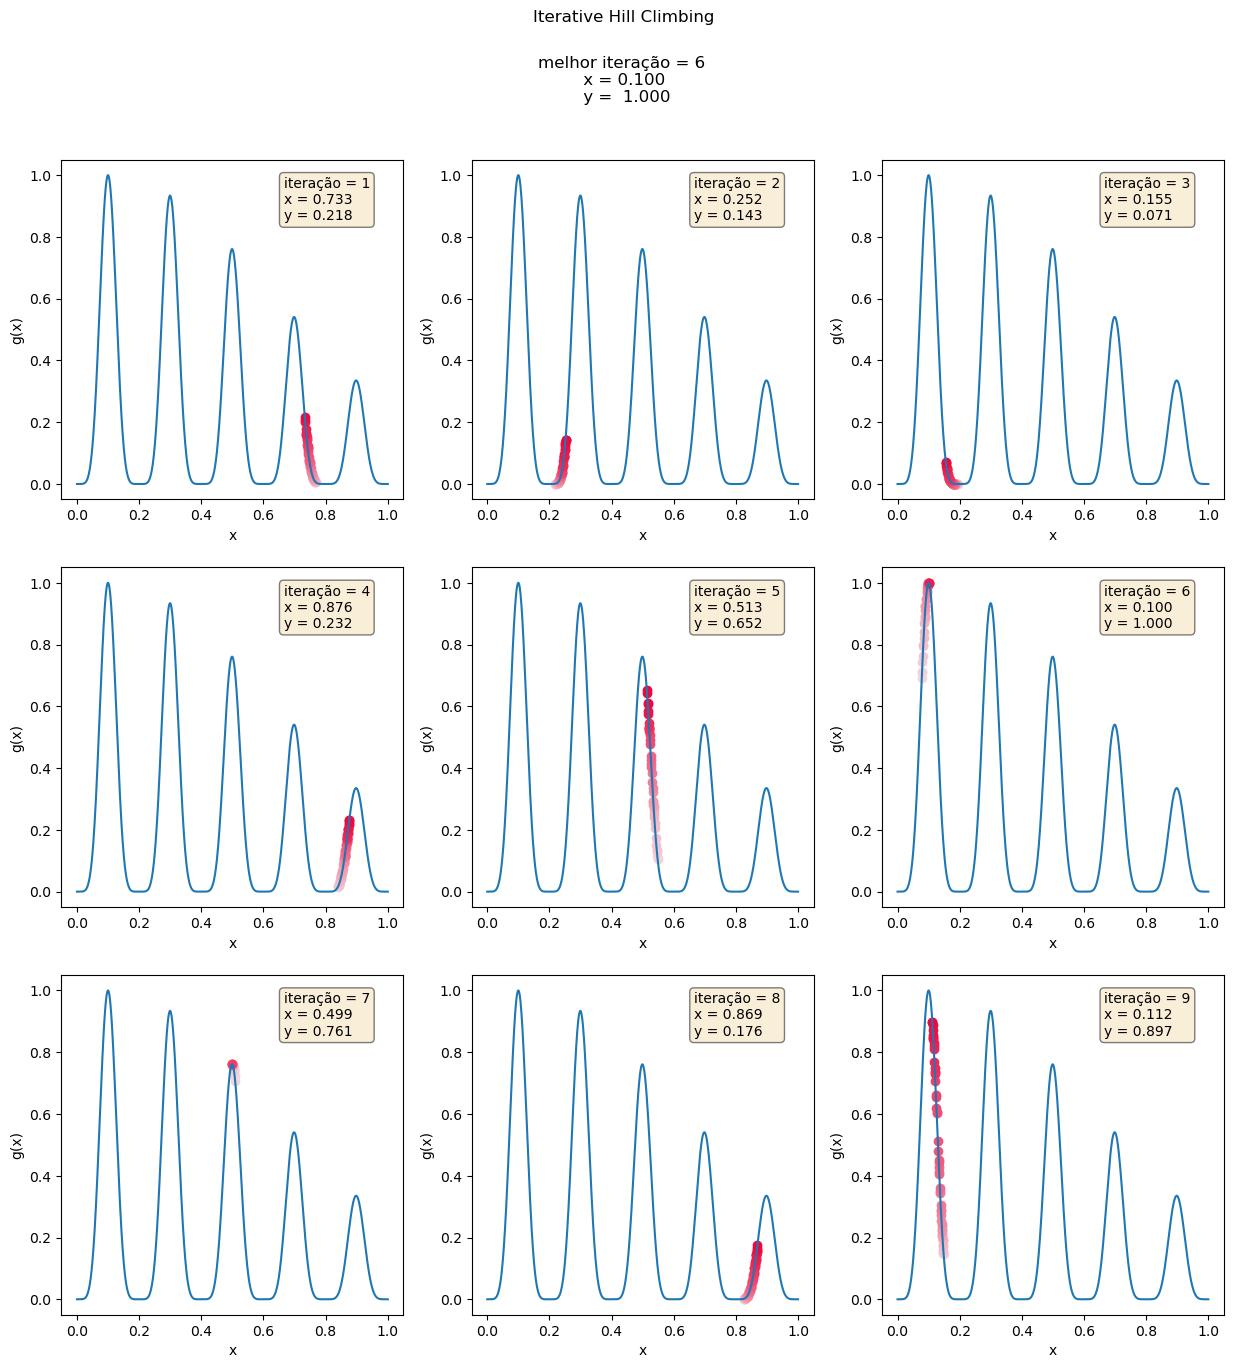

0.10000487641506246

In [41]:
ihc_v2(9, 100, 1.0, hill_climbing_v2)

<p>Nota-se que se aumentarmos <i>n_start</i> há maior probabilidade de se encontrar o máximo global pois há mais exploração: porém podemos cair num problema de força bruta.</p>

<h1> Subida da Colina Probabilístico </h1>
<p>Nesta versão a probabilidade de que x' seja selecionado depende da diferença entre os valores retornados pela função de avaliação para x e x'; </p>

<p> Com um novo parâmetro <i>T</i>, controla-se o decaimento da função exponencial.</p>


<p>A probabilidade de que um novo x' seja aceito é dada por</p>

$$
    P = \frac{1}{1 + \exp({\frac{avaliar(x) - avaliar(x')}{T}})}
$$

<p>Quanto maior T, menor a importância da avaliação de x e x', ou seja, fica similar a uma busca aleatória </p>

In [19]:
def probabilidade(x, xi, T):
    return (1 / (1 + np.exp( (avaliar(x) - avaliar(xi)) / T)))

In [20]:
def stochastic_hill_climbing(max_it, g, T):
    T = 0.1
    x = inicializar_x()
    y = avaliar(x)
    t = 1
    while t <= max_it and y != g:
        xi = perturbar(x)
        yi = avaliar(xi)
        if random.uniform(0,1) < probabilidade(x, xi, T):
            x = xi
            y = yi
        t += 1
    return x

In [21]:
shc_x = stochastic_hill_climbing(100, 1, 0.1)
print("x = " + str(shc_x) + ", y = " + str(avaliar(shc_x)) )

x = 0.08559057266230387, y = 0.8560906520289904


In [64]:
def runSubidaDaColinaProbabilistico():
    time_ = []
    brs_ = []
    for i in range(100):
        start = time.process_time()
        r = stochastic_hill_climbing(100, 1, 0.3)
        end = time.process_time()
        time_.append(end-start)
        brs_.append(r)
    print(f"best results \t mean:  %.3f"%mean(brs_), f"\t\t stdev:  %.3f"%stdev(brs_))
    print("time \t \t mean: ", mean(time_), "\t stdev: ", stdev(time_))
    return time_

t = runSubidaDaColinaProbabilistico()

best results 	 mean:  0.485 		 stdev:  0.279
time 	 	 mean:  0.000625 	 stdev:  0.003077287274483318


<p>Nota-se que há certa aleatoriedade nos resultados. Vamos visualizar como este algoritmo se comporta.</p>

In [22]:
def stochastic_hill_climbing_v2(max_it, T, axes, txt):
    axes.set_xlabel("x")
    axes.set_ylabel("g(x)")
    grafico_func(axes, avaliar)
    colors = get_color_gradient("#f2d8de", "#f0053c", max_it)
    x = inicializar_x()
    y = avaliar(x)
    g = 1.0
    t = 1
    while t <= max_it and y != g:
        xi = perturbar(x)
        yi = avaliar(xi)
        if random.uniform(0,1) < probabilidade(x, xi, T):
            x = xi
            y = yi
            axes.scatter(x, y, c= colors[t-1])
        t += 1
    txt = '\n'.join((txt, f'x = %.3f'%x, f'y = %.3f'%avaliar(x)))
    axes.text(0.65, 0.95, txt, transform=axes.transAxes, fontsize=10, verticalalignment='top', bbox= dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    return x

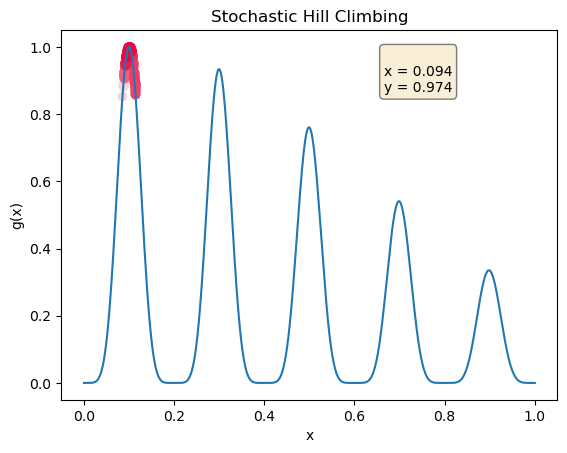

In [23]:
showAlg("Stochastic Hill Climbing", stochastic_hill_climbing_v2, 2000, 0.1)

<p> Podemos ver que, como depende de certa aleatoriedade, o algoritmo até desce a colina, sendo possível que ultrapasse um maximo local e encontre o global. </p>

<p>Agora visualizando como se comporta na versão iterativa</p>

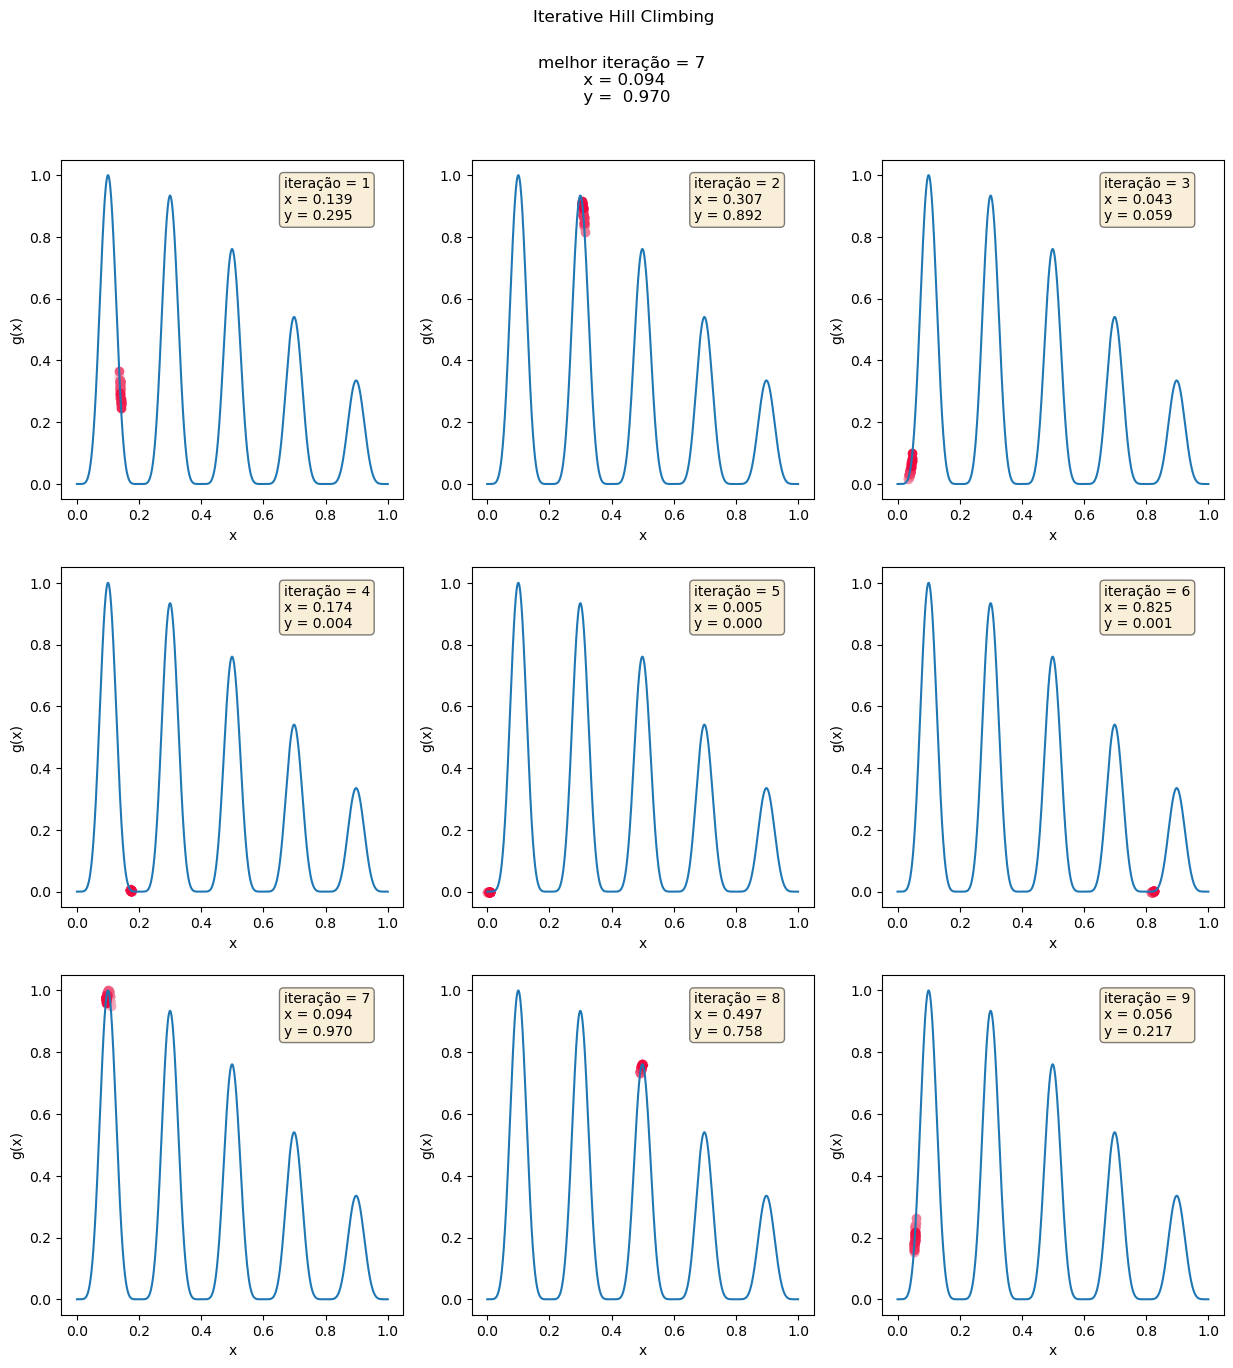

0.0935558788207281

In [42]:
ihc_v2(9, 100, 1.0, stochastic_hill_climbing_v2, T= 0.3)

<p> Apesar da maior probabilidade de sair de um máximo local, o algoritmo pode também sair do máximo global quando o encontrar, vemos que o hillClimbing clássico tem mais sucesso encontrando o máximo global na versão itertiva que o probabilístico.</p>
<p> Vamos variar o valor de T e ver como o algoritmo se comporta: </p>

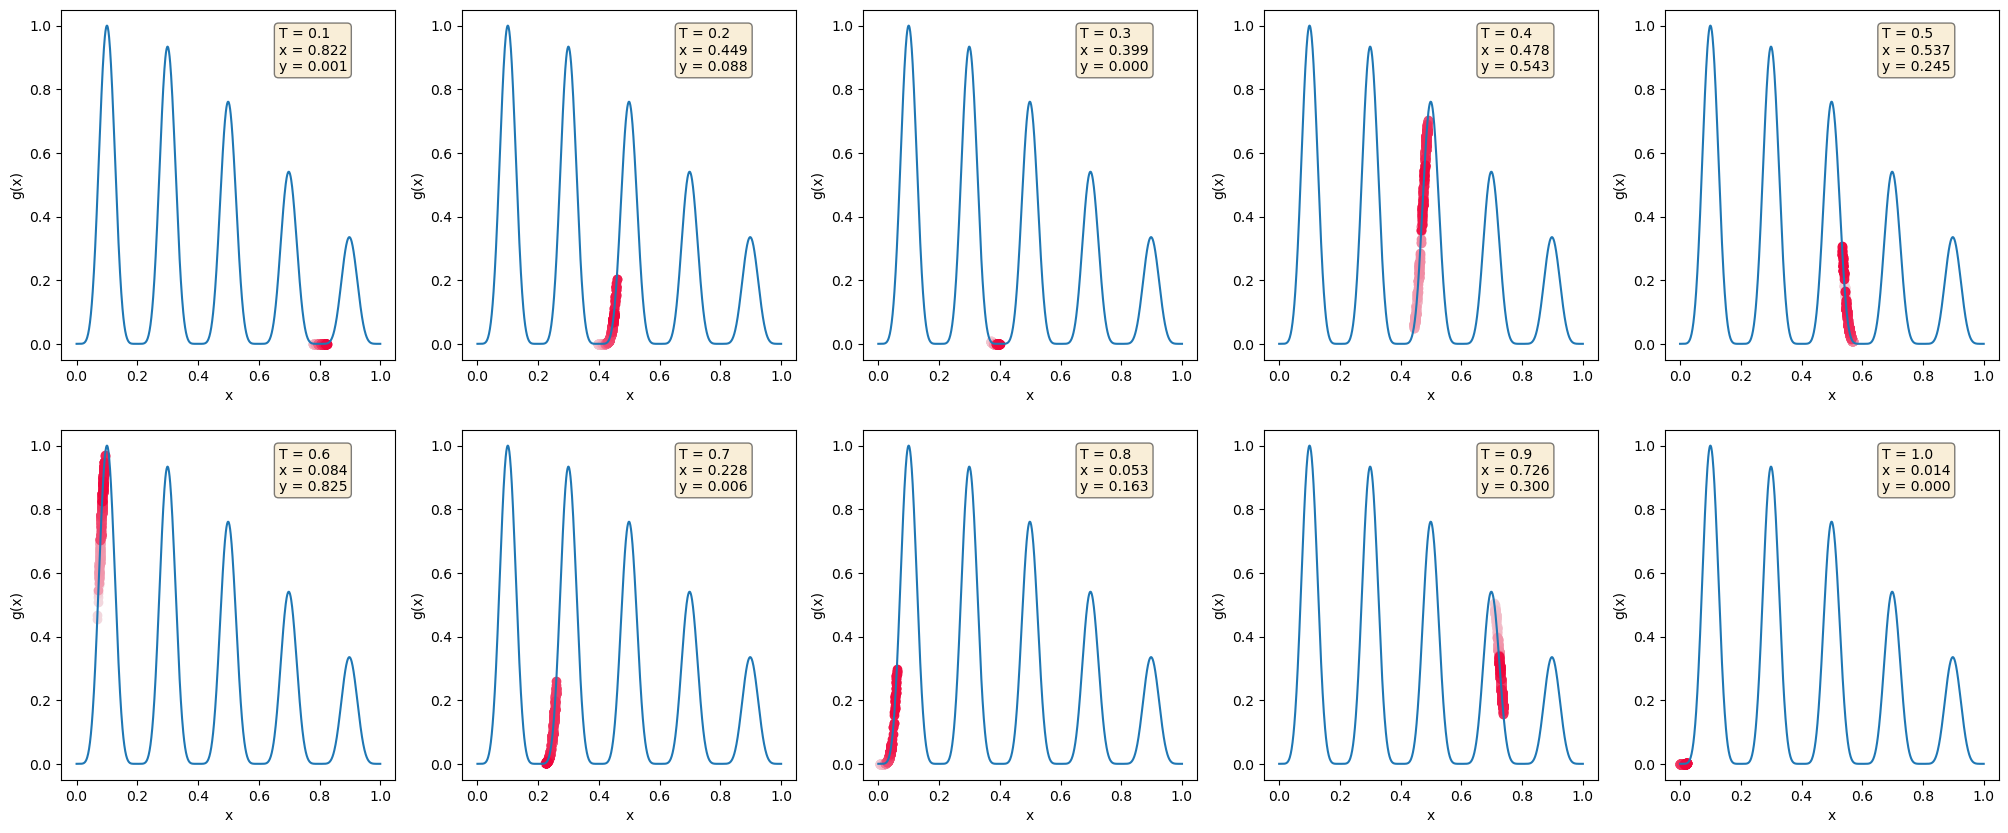

In [25]:
def shc_variando_T():
    fig, axs = plt.subplots(2, 5, figsize=(25, 10))
    fig.suptitle('')
    c = 1
    for i in range(1, 3):
        for j in range(1, 6):
            T = c*0.1
            txt = 'T = %.1f'%(T)
            x = stochastic_hill_climbing_v2(1000, T, axs[i-1, j-1], txt)
            c += 1
    plt.show()

shc_variando_T()

<p> Em alguns ele parece não sair do mínimo, em outros ele passa pelo máximo e desce, em outros ele sobe e desce a curva. Rodando várias vezes vemos que o comportamento fica mais aleatório (vai e volta nos valores de x mais vezes) </p>

<p>Se aumentamos o valor do Delta de perturbar, haverá mais chances que o algoritmo encontre o máximo global, uma vez que possa dar passos maiores em sua busca.</p>

<h1>Recozimento Simulado</h1>
<p>Insirado pelo processo de recozimento de materias - aquecer um material e resfriá-lo lentamente - o Recozimento Simulado busca um estado do sistema que seja uma possível solução. A energia do sistema é medida pela função de avaliação e um estado de equilíbrio equivale a um ótimo local enquanto o estado de mínima energia é o global; A temperatura é um parâmetro de controle e a busca é feita reduzindo-a.</p>
<p>Seja x a atual configuração do sistema, x' a configuração de x após um pequeno deslocamento aleatório e T a temperatura do sistema, a função g(T, t) é responsável por reduzir o valor da temperatura geometricamente:
</p>

$$
    T = \beta * T \\ onde \; \beta < 1
$$



In [66]:
beta = 1 / 1.5

In [68]:
def g(temp):
    return temp * beta

In [69]:
def probabilidade_annealing (x, xi, temp):
    return np.exp( (avaliar(xi) - avaliar(x)) / temp)

<p> O algoritmo é definido como: </p>

In [70]:
def simulated_annealing(temp, min_temp, k):
    x = inicializar_x()
    while temp >= min_temp:
        i = 1
        xi = inicializar_x()
        while i < k:
            xi = perturbar(xi)
            if (avaliar(xi) > avaliar(x)):
                x = xi
            elif (random.uniform(0,1) < probabilidade_annealing(x, xi, temp)):
                x = xi
            i += 1
        temp = g(temp)
    return x

In [71]:
sa_x = simulated_annealing(100, 3, 100)
print("x = " + str(sa_x) + ", y = " + str(avaliar(sa_x)) )

x = 0.08769814862660504, y = 0.8931642043478472


In [72]:
def runRecozimentoSimulado():
    time_ = []
    brs_ = []
    for i in range(100):
        start = time.process_time()
        r = simulated_annealing(100, 3, 100)
        end = time.process_time()
        time_.append(end-start)
        brs_.append(r)
    print(f"best results \t mean:  %.3f"%mean(brs_), f"\t\t stdev:  %.3f"%stdev(brs_))
    print("time \t \t mean: ", mean(time_), "\t stdev: ", stdev(time_))
    return time_

t = runRecozimentoSimulado()

best results 	 mean:  0.454 		 stdev:  0.282
time 	 	 mean:  0.0025 	 stdev:  0.006170581271835194


In [31]:
def simulated_annealing_v2(temp, min_temp, k, axes, txt):
    axes.set_xlabel("x")
    axes.set_ylabel("g(x)")
    grafico_func(axes, avaliar)
    colors = get_color_gradient("#f2d8de", "#f0053c", k)
    x = inicializar_x()
    while temp >= min_temp:
        i = 1
        xi = inicializar_x()
        while i < k:
            xi = perturbar(xi)
            if (avaliar(xi) > avaliar(x)):
                x = xi
                axes.scatter(x, avaliar(x), c= colors[k-1])
            elif (random.uniform(0,1) < probabilidade_annealing(x, xi, temp)):
                x = xi
                axes.scatter(x, avaliar(x), c= colors[k-1])
            i += 1
        temp = g(temp)
    txt = '\n'.join((txt, f'x = %.3f'%x, f'y = %.3f'%avaliar(x)))
    axes.text(0.65, 0.95, txt, transform=axes.transAxes, fontsize=10, verticalalignment='top', bbox= dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    return x

T = 100
T = 66.66666666666666
T = 44.444444444444436
T = 29.629629629629623
T = 19.75308641975308
T = 13.168724279835388
T = 8.779149519890257
T = 5.852766346593505
T = 3.9018442310623365
T = 2.6012294873748907
T = 1.7341529915832603
T = 1.1561019943888402


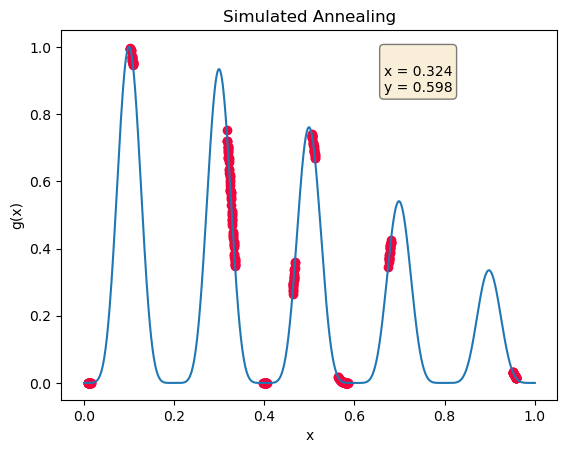

In [44]:
fig, ax = plt.subplots()
ax.set_title("Simulated Annealing")
resultado = simulated_annealing_v2(100, 1, 25, ax, '')

plt.show()

<p>O recozimento simulado é como se todas as subidas na colina se juntassem num só algoritmo.</p>
<p>Se aumentamos k ou a temperatura a chance de encontrar o máximo global é bem grande.</p>

In [33]:
def sa_variando_T():
    fig, axs = plt.subplots(2, 5, figsize=(25, 10))
    fig.suptitle('')
    c = 1
    for i in range(1, 3):
        for j in range(1, 6):
            T = 100 + c * 10
            txt = 'T = %.1f'%(T)
            simulated_annealing_v2(T, 1, 100, axs[i-1, j-1], txt)
            c += 1
    plt.show()

sa_variando_T()

T = 110
T = 73.33333333333333
T = 48.888888888888886
T = 32.59259259259259
T = 21.728395061728392
T = 14.485596707818928
T = 9.657064471879284
T = 6.438042981252856
T = 4.29202865416857
T = 2.86135243611238
T = 1.9075682907415867
T = 1.2717121938277245
T = 120
T = 80.0
T = 53.33333333333333
T = 35.55555555555555
T = 23.7037037037037
T = 15.802469135802465
T = 10.53497942386831
T = 7.0233196159122055
T = 4.682213077274803
T = 3.1214753848498686
T = 2.0809835898999123
T = 1.3873223932666081
T = 130
T = 86.66666666666666
T = 57.77777777777777
T = 38.51851851851851
T = 25.679012345679006
T = 17.119341563786
T = 11.412894375857334
T = 7.608596250571556
T = 5.072397500381037
T = 3.3815983335873576
T = 2.2543988890582383
T = 1.5029325927054922
T = 1.0019550618036615
T = 140
T = 93.33333333333333
T = 62.222222222222214
T = 41.481481481481474
T = 27.654320987654316
T = 18.43621399176954
T = 12.290809327846361
T = 8.193872885230906
T = 5.462581923487271
T = 3.641721282324847
T = 2.42781418821656

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002EFED86BEC0> (for post_execute):


KeyboardInterrupt: 

T = 100
T = 66.66666666666666
T = 44.444444444444436
T = 29.629629629629623
T = 19.75308641975308
T = 13.168724279835388
T = 8.779149519890257
T = 5.852766346593505
T = 3.9018442310623365
T = 2.6012294873748907
T = 1.7341529915832603
T = 1.1561019943888402
T = 100
T = 66.66666666666666
T = 44.444444444444436
T = 29.629629629629623
T = 19.75308641975308
T = 13.168724279835388
T = 8.779149519890257
T = 5.852766346593505
T = 3.9018442310623365
T = 2.6012294873748907
T = 1.7341529915832603
T = 1.1561019943888402
T = 100
T = 66.66666666666666
T = 44.444444444444436
T = 29.629629629629623
T = 19.75308641975308
T = 13.168724279835388
T = 8.779149519890257
T = 5.852766346593505
T = 3.9018442310623365
T = 2.6012294873748907
T = 1.7341529915832603
T = 1.1561019943888402
T = 100
T = 66.66666666666666
T = 44.444444444444436
T = 29.629629629629623
T = 19.75308641975308
T = 13.168724279835388
T = 8.779149519890257
T = 5.852766346593505
T = 3.9018442310623365
T = 2.6012294873748907
T = 1.734152991583

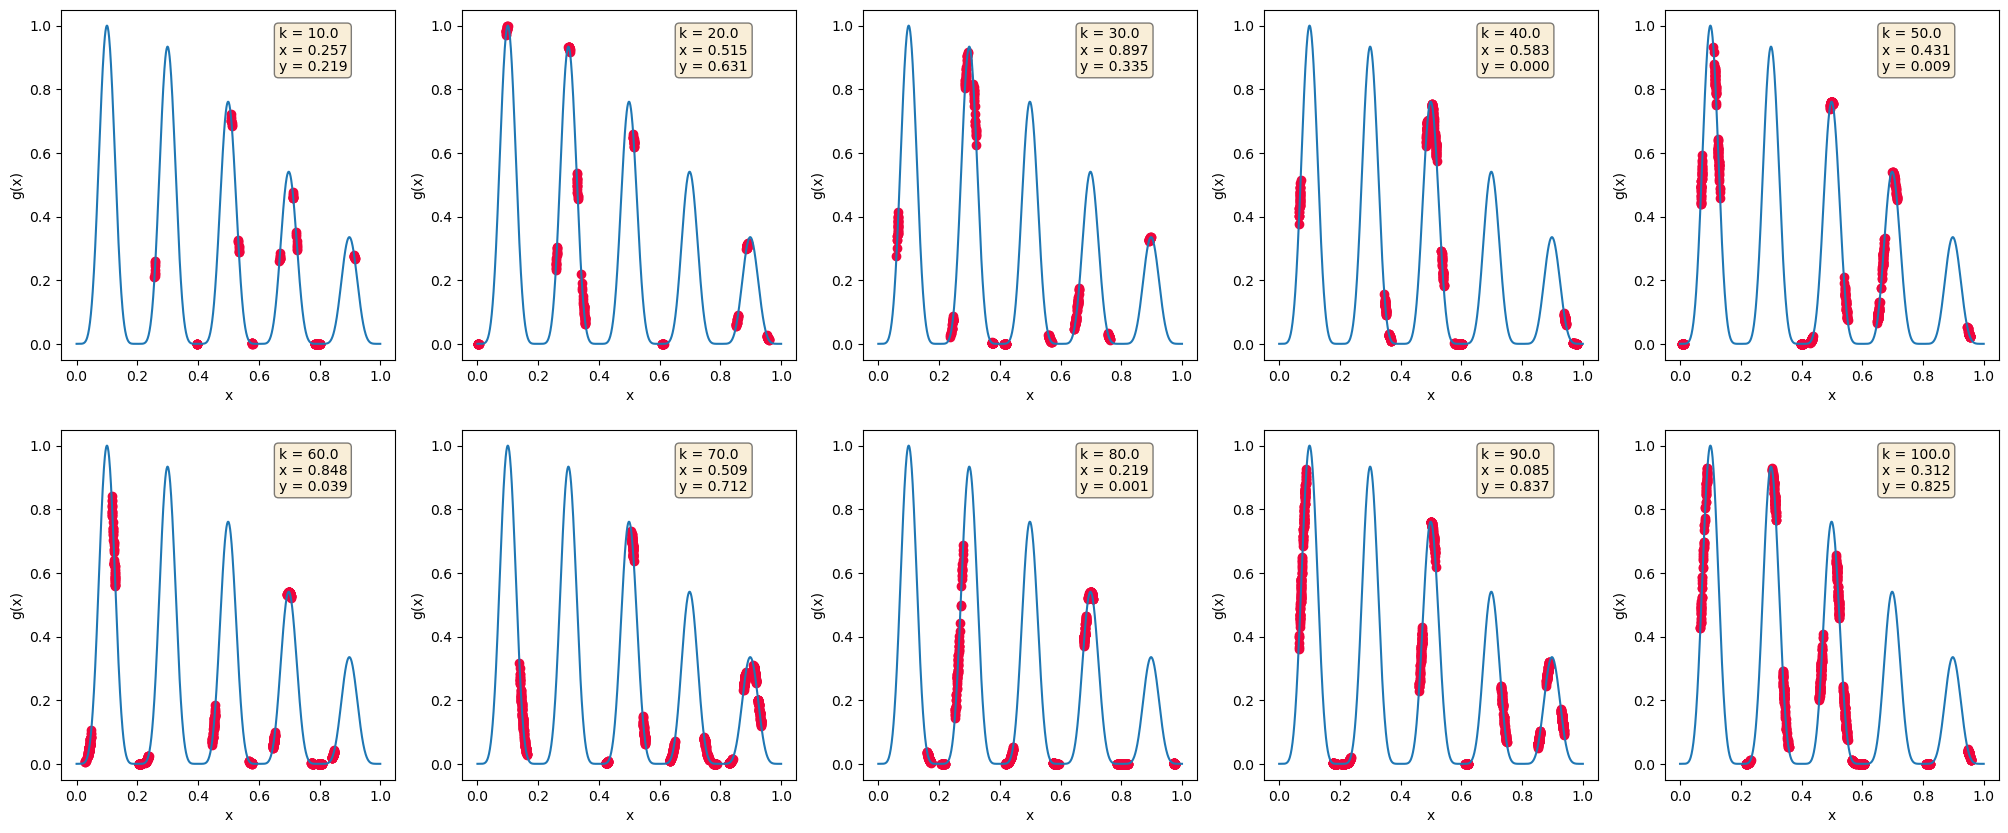

In [ ]:
def sa_variando_k():
    fig, axs = plt.subplots(2, 5, figsize=(25, 10))
    fig.suptitle('')
    c = 1
    for i in range(1, 3):
        for j in range(1, 6):
            k = c * 10
            txt = 'k = %.1f'%(k)
            simulated_annealing_v2(100, 1, k, axs[i-1, j-1], txt)
            c += 1
    plt.show()

sa_variando_k()

<p> Em ambos os casos parece que o algoritmo passa pelo ótimo global, porém, por conta da aleatoriedade, o melhor x parece ser sobrescrito com outros valores que não o maior </p>